In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hr = pd.read_csv("hr.csv")
hr = hr.rename(columns = {"number_project":"n_projects", 
                          "time_spend_company":"n_years", 
                          "average_montly_hours":"average_monthly_hours"})
hr.head()


,satisfaction_level,last_evaluation,n_projects,average_monthly_hours,n_years,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Our dataset has 10 variables describing characteristics of 14999 employees at an undisclosed company. **satisfaction_level** is a numeric variable describing the self reported level of satisfaction of the employee as a percentage from 0-100, **last_evaluation** is a numeric variable describing the employer's evaluation of the employee's performance as a percentage, **n_projects** is an integer variable of the number of projects the employee worked on, **average_monthly_hours** is a numeric variable measuring the average number of hours the employee works each month (around 160 is an average 40 hour work week), **n_years** is an integer variable measuring the number of years the employee has worked at the company, **Work_accident** is a binary classifier describing if the employee was involved in a work accident, **promotion_last_5years** is a binary classifier for if the employee received a promotion in the last 5 years, **department** is a categorical variable describing which department the employee worked in, **salary** is a categorical variable describing the relative salary level of the employee, and **left** is our binary outcome variable describing if the employee left the company or not. Below is a table of descriptive statistics of the distribution of the numerical, integer, and binary variables.

In [49]:
hr.describe()

,satisfaction_level,last_evaluation,n_projects,average_monthly_hours,n_years,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Salary

In [31]:
pd.crosstab(hr.salary, hr.left, normalize = 'index')

pd.crosstab(pd.cut(hr.satisfaction_level, 5, labels = ["0-20", "20-40", "40-60", "60-80", "80-100"]), hr.salary, normalize = 'index')

salary,high,low,medium
satisfaction_level,,,
0-20,0.064921,0.529733,0.405346
20-40,0.055876,0.558315,0.385809
40-60,0.101047,0.447320,0.451633
60-80,0.092197,0.466649,0.441154
80-100,0.080910,0.481756,0.437335


Employee Satisfaction

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

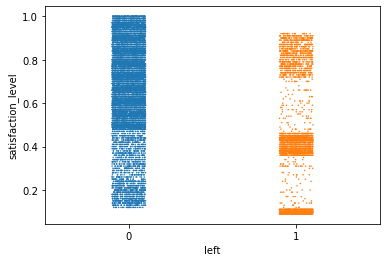

In [51]:
sns.stripplot(data = hr, x = "left", y = "satisfaction_level", size = 1.5)

/Users/mikehatfieldiv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

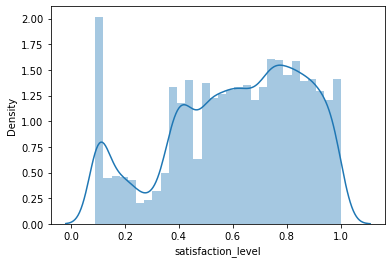

In [52]:
sns.distplot(hr.satisfaction_level)

In [53]:
pd.crosstab(
    pd.cut(hr.satisfaction_level, 5, labels = ["0-20", "20-40", "40-60", "60-80", "80-100"]), 
    hr.left,
    normalize = "index")

left,0,1
satisfaction_level,,
0-20,0.486634,0.513366
20-40,0.325055,0.674945
40-60,0.954097,0.045903
60-80,0.881277,0.118723
80-100,0.868324,0.131676


Last Employer Evaluation

<AxesSubplot:xlabel='left', ylabel='last_evaluation'>

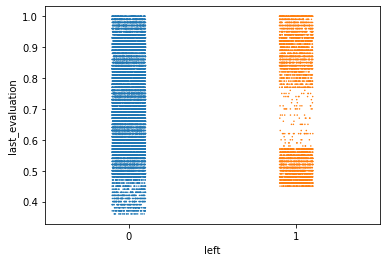

In [24]:
sns.stripplot(x = hr.left, y = hr.last_evaluation, size = 1.5)

C:\Users\Jerimiah Koll\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

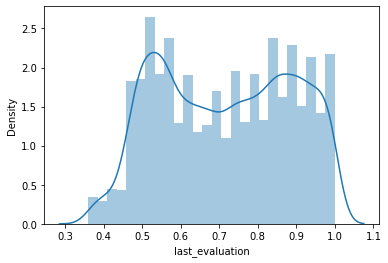

In [23]:
sns.distplot(hr.last_evaluation)

In [22]:
pd.crosstab(
    pd.cut(hr.last_evaluation, 5, labels = ["0-20", "20-40", "40-60", "60-80", "80-100"]), 
    hr.left,
    normalize = "index")

left,0,1
last_evaluation,,
0-20,0.614887,0.385113
20-40,0.711941,0.288059
40-60,0.973702,0.026298
60-80,0.771294,0.228706
80-100,0.686843,0.313157


Monthly Hours

<AxesSubplot:xlabel='left', ylabel='average_monthly_hours'>

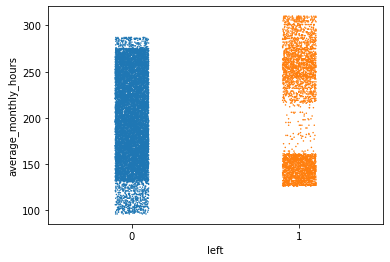

In [16]:
sns.stripplot(data = hr, x = "left", y = "average_monthly_hours", size = 1.5)

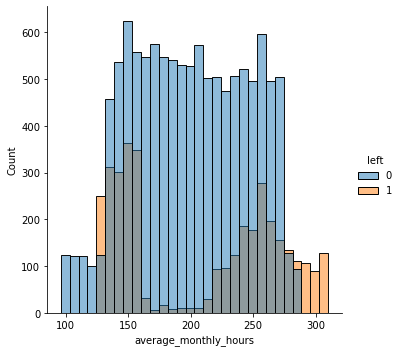

In [71]:
sns.displot(x = hr.average_monthly_hours, hue = hr.left, kind = "hist")

In [55]:
pd.crosstab(
    pd.cut(hr.average_monthly_hours, 5), 
    hr.left,
    normalize = "index")

left,0,1
average_monthly_hours,,
"(95.786, 138.8]",0.651525,0.348475
"(138.8, 181.6]",0.760269,0.239731
"(181.6, 224.4]",0.951198,0.048802
"(224.4, 267.2]",0.745779,0.254221
"(267.2, 310.0]",0.499655,0.500345


Number of Projects

<AxesSubplot:xlabel='left', ylabel='n_projects'>

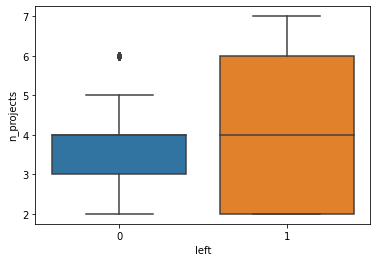

In [13]:
sns.boxplot(y = hr.n_projects, x = hr.left)

In [5]:
pd.crosstab(hr.n_projects, hr.left, normalize = "index")

left,0,1
n_projects,,
2,0.343802,0.656198
3,0.982244,0.017756
4,0.906300,0.093700
5,0.778341,0.221659
6,0.442078,0.557922
7,0.000000,1.000000


Number of Years Working with Company

left,0,1
n_years,,
2,0.983662,0.016338
3,0.753841,0.246159
4,0.651936,0.348064
5,0.434487,0.565513
6,0.708914,0.291086
7,1.000000,0.000000
8,1.000000,0.000000
10,1.000000,0.000000


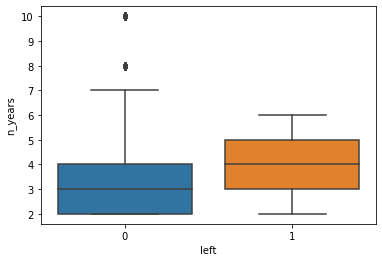

In [21]:
sns.boxplot(y = hr.n_years, x = hr.left)
pd.crosstab(hr.n_years, hr.left, normalize= "index")

Correlation Heatmap

<AxesSubplot:>

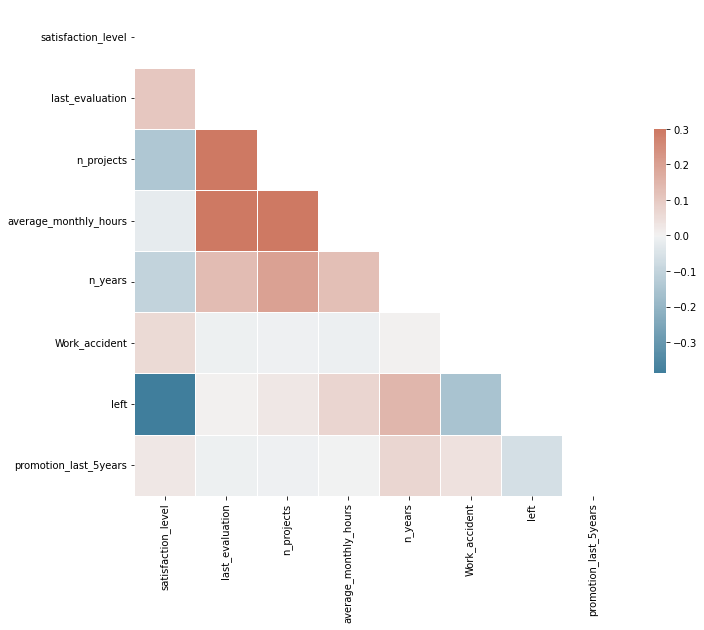

In [29]:
corr = hr.corr() ##https://seaborn.pydata.org/examples/many_pairwise_correlations.html code from here
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Leaving is negatively corrlated with satisfaction levels, and positively correlated with number of projects, monthly hours worked, and number of years working at the company. 
Of note is how employee satisfaction is also negatively corelatted with number of years working with the company, number of projects, and monthly hours.
This seems to indicate that workload is a major driver of employee satisfaction, and when workload gets too high employees leave. This company could reduce workload in one of two ways, reducing monthly hours worked, or reducing how many projects people are working on at a time. The company would likely have to hire new employees to make up for the reduced productivity of employees.
Another potenetial solution to high employee turnover would have to do with employees who have been with the company for many years. Employees who have been with the company for 3-5 years are very likely to quit. However, its obviously unsustainable to not have anyone work for more than 2 years. While workload reduction would seem to benefit employees who have been with the company longer as more experienced employees tend to work more hours and have more projects, additional incentives may be necesary. 